# Chapter 3 notebook

we will use the MNIST dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:

from sklearn.datasets import fetch_openml


In [3]:
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=mnist["data"],mnist["target"]
X.shape
y.shape

(70000,)

In [5]:
y[0]

'5'

In [16]:
some_digit = X[0]
"""some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()"""

KeyError: 0

In [17]:
y = y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [21]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([some_digit])

NameError: name 'some_digit' is not defined

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [24]:
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

KeyError: "None of [Int64Index([    1,     3,     4,     5,     7,     8,    10,    11,    12,\n               13,\n            ...\n            59984, 59985, 59987, 59988, 59989, 59991, 59993, 59994, 59996,\n            59998],\n           dtype='int64', length=40000)] are in the [columns]"

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [28]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [29]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)


## Exercise 

## 1

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

## 2  Data augmentation


In [4]:
from scipy.ndimage.interpolation import shift

In [5]:
def shift_image(image,dx,dy):
    image=image.reshape((28,28))
    shifted_image=shift(image,[dx,dy],cval=0,mode='constant')
    return shifted_image.reshape([-1])

In [6]:
image =X_train[1000]
shifted_image_down=shift_image(image,0,5)
shifted_image_left=shift_image(image,-5,0)


NameError: name 'X_train' is not defined


## 3 Titanic dataset


In [2]:
import os 
TITANIC_PATH=os.path.join('datasets','titanic')

In [3]:
import pandas as pd

def load_titanic_data(filename,titanic_path=TITANIC_PATH):
    csv_path=os.path.join(titanic_path,filename)
    return pd.read_csv(csv_path)

In [4]:
train_data=load_titanic_data('train.csv')
test_data=load_titanic_data('test.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline=Pipeline([
    ('select_numeric',DataFrameSelector(['Age',"SibSp","Parch",'Fare'])),
    ('imputer',SimpleImputer(strategy='median')),
])

In [9]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [21]:
class MostFrequentImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        self.most_frequent_=pd.Series([X[c].value_counts().index[0] for c in X],index=X.columns)
        
        return self
    
    def transform(self,X,Y=None):
        return X.fillna(self.most_frequent_)

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cat_pipeline = Pipeline([
    ('select_cat',DataFrameSelector(['Pclass','Sex','Embarked'])),
    ('imputer',MostFrequentImputer()),
    ('cat_encoder',OneHotEncoder(sparse=False))
])

In [24]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [25]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

In [27]:
X_train= preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [29]:
y_train = train_data['Survived']

In [30]:
from sklearn.svm import SVC

svm_clf=SVC(gamma='auto')
svm_clf.fit(X_train,y_train)

SVC(gamma='auto')

In [32]:
X_test=preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [33]:
from sklearn.model_selection import cross_val_score

svm_scores=cross_val_score(svm_clf,X_train,y_train,cv=10)
svm_scores.mean()

0.7329588014981274

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
forest_scores=cross_val_score(forest_clf,X_train,y_train,cv=10)
forest_scores.mean()

0.8126466916354558

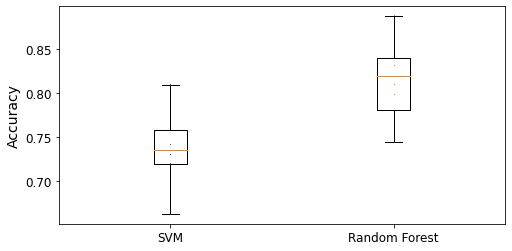

In [35]:
plt.figure(figsize=(8,4))
plt.plot([1]*10,svm_scores,',')
plt.plot([2]*10,forest_scores,',')
plt.boxplot([svm_scores,forest_scores],labels=('SVM',"Random Forest"))
plt.ylabel("Accuracy",fontsize=14)
plt.show()


To improve this result further, you could:

Compare many more models and tune hyperparameters using cross validation and grid search,
Do more feature engineering, for example:
replace SibSp and Parch with their sum,
try to identify parts of names that correlate well with the Survived attribute (e.g. if the name contains "Countess", then survival seems more likely),
try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).

In [36]:
train_data["AgeBucket"]=train_data["Age"]
train_data[['AgeBucket',"Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [38]:
train_data['RelativesOnboard']=train_data.SibSp+train_data.Parch
train_data[['RelativesOnboard','Survived']].groupby(['RelativesOnboard']).mean()


,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


## Spam Classifier

In [2]:
import os 
import tarfile 
import urllib.request

DOWNLOAD_ROOT ='http://spamassassin.apache.org/old/publiccorpus/'
HAM_URL=DOWNLOAD_ROOT+'20030228_easy_ham.tar.bz2'
SPAM_URL=DOWNLOAD_ROOT+'20030228_spam.tar.bz2'
SPAM_PATH=os.path.join('datasets','spam')

def fetch_spam_data(ham_url=HAM_URL,spam_url=SPAM_URL,spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename,url in (('ham.tar.bz2',ham_url),('spam.tar.bz2',spam_url)):
        path=os.path.join(spam_path,filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url,path)
        tar_bz2_file=tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [3]:
fetch_spam_data()

In [4]:
HAM_DIR=os.path.join(SPAM_PATH,'easy_ham')
SPAM_DIR=os.path.join(SPAM_PATH,'spam')
ham_filenames=[name for name in sorted(os.listdir(HAM_DIR)) if len(name)>20]
spam_filenames=[name for name in sorted(os.listdir(SPAM_DIR)) if len(name)>20]

In [5]:
len(ham_filenames)

2500

In [6]:
len(spam_filenames)

500

In [7]:
import email 
import email.policy

def load_email(is_spam,filename,spam_path=SPAM_PATH):
    directory='spam' if is_spam else 'easy_ham'
    with open(os.path.join(spam_path,directory,filename),'rb') as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)

In [8]:
ham_emails=[load_email(is_spam=False,filename=name) for name in ham_filenames]
spam_emails=[load_email(is_spam=True,filename=name) for name in spam_filenames]

In [9]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [10]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [12]:
def get_email_structure(email):
    if isinstance(email,str):
        return email
    payload = email.get_payload()
    if isinstance(payload,list):
        return 'multipart({})'.format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [13]:
from collections import Counter 

def structures_counter(emails):
    structures=Counter()
    for email in emails:
        structure=get_email_structure(email)
        structures[structure]+=1
    return structures

In [14]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [15]:
structures_counter(spam_emails).most_common()


[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [17]:
for header,value in spam_emails[0].items():
    print(header,':',value )

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [18]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [19]:
import numpy as np 
from sklearn.model_selection import train_test_split

X=np.array(ham_emails+spam_emails,dtype=object)
y=np.array([0]*len(ham_emails)+[1]*len(spam_emails))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


We need to convert HTML to string without using BeautifulSoup 
https://stackoverflow.com/questions/1732348/regex-match-open-tags-except-xhtml-self-contained-tags/1732454#1732454

In [20]:
import re 
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>','',html, flags=re.M|re.S|re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [30]:
html_spam_emails=[email for email in X_train[y_train==1] if get_email_structure(email)=="text/html"]
sample_html_spam=html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000],'...')

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [31]:
print(html_to_plain_text(sample_html_spam.get_content().strip())[:1000],'...')


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [37]:
def email_to_text(email):
    html=None
    for part in email.walk():
        ctype= part.get_content_type()
        if not ctype in ('text/plain','text/html'):
            continue 
        try:
                content = part.get_content()
        except:
                content =str(part.get_payload())
        if ctype=='text/plain':
                return content
        else:
                html=content 
    if html:
            return html_to_plain_text(html)

In [38]:
print(email_to_text(sample_html_spam)[:100],'...')


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


In [39]:
try:
    import nltk 
    stemmer=nltk.PorterStemmer()
    for word in ('Computations','Computation','Computing','Computed','Compute',"Compulsive"):
        print(word,'->',stemmer.stem(word))
except ImportError:
    print("Error :stemming requires nltk library")
    stemmer=None

Computations -> comput
Computation -> comput
Computing -> comput
Computed -> comput
Compute -> comput
Compulsive -> compuls



To replace URLs with the word URL we will use urlextract instead of regex

In [40]:
try :
    import urlextract
    
    url_extractor=urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [50]:
X_few=X_train[:3]
X_few_wordcounts=EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

In [53]:
from scipy.sparse import csr_matrix
class WordCounterToVectorTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,vocabulary_size=1000):
        self.vocabulary_size=vocabulary_size
    def fit(self,X,y=None):
        total_count=Counter()
        for word_count in X:
            for word,count in word_count.items():
                total_count[word]+=min(count,10)
        most_common=total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_={word:index+1 for index,(word,count) in enumerate(most_common)}
        return self
    def transform(self,X,y=None):
        rows=[]
        cols=[]
        data=[]
        for row, word_count in enumerate(X):
            for word ,count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word,0))
                data.append(count)
        return csr_matrix((data,(rows,cols)),shape=(len(X),self.vocabulary_size+1))

In [54]:
vocab_transformer =WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors=vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.intc'>'
	with 20 stored elements in Compressed Sparse Row format>

In [55]:
X_few_vectors.toarray()

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
       [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]], dtype=int32)

In [56]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

In [57]:
from sklearn.pipeline import Pipeline

preprocess_pipeline=Pipeline([
    ('email_to_wordcount',EmailToWordCounterTransformer()),
    ('wordcount_to_vector',WordCounterToVectorTransformer())
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf=LogisticRegression(solver='lbfgs',max_iter=1000,random_state=42)
score=cross_val_score(log_clf,X_train_transformed,y_train,cv=3,verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.981) total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.984) total time=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.990) total time=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


0.985

In [61]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 96.88%
Recall: 97.89%
